# DATOS ORIGINALES

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Entrenamos varios modelos con los datos de entrenamiento proporcionados, y evaluamos cuál es el mejor de ellos

In [11]:
# Ruta a la carpeta de entrenamiento que contiene subcarpetas con imágenes de frutas
data_dir = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\train\train"

# Lista de clases (nombres de las subcarpetas)
classes = os.listdir(data_dir)

# Listas para almacenar las imágenes y las etiquetas
images = []
labels = []

# Leer las imágenes y etiquetas desde las subcarpetas
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a formato RGB si es necesario
        images.append(img)
        labels.append(class_name)

# Codificar las etiquetas en valores numéricos
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Aplanar y redimensionar las imágenes (ajusta el tamaño según tus necesidades)
X_train = [img.flatten() for img in X_train]
X_test = [img.flatten() for img in X_test]

# Definir una lista de modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Realizar la clasificación de imágenes y encontrar el mejor modelopip uninstall opencv-python
best_model = None
best_accuracy = 0.0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} - Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f'Mejor modelo: {best_model}')

Random Forest - Accuracy: 1.0
SVM - Accuracy: 0.9997033521210323
K-Nearest Neighbors - Accuracy: 0.9997033521210323
Mejor modelo: RandomForestClassifier()


Podríamos hacer un modelo de clasificación basado en redes neuronales, auqnue lo dejaremos como ejercicio fuera de esto ya que no hay tiempo para realizar todas las tareas. En general modelos simples consiguen un buen rendimiento, por lo que no vamos a profundizar en esto para priorizar la generación de imégenes.

Observaciones:

1. Problemas en las rutas de directorios con los espacios
2. El SVM es muy lento, random forest razonable y el knn rápido

Guardamos el modelo entrenado que ha dado mejor resultado, para poder utilizarlo luego con los datos de test

In [12]:
import joblib

# Supongamos que 'best_model' es el mejor modelo que deseas guardar

# Ruta donde se guardará el modelo
model_save_path = 'mejor_modelo.pkl'

# Guardar el mejor modelo en un archivo .pkl
joblib.dump(best_model, model_save_path)

print(f'Mejor modelo guardado en {model_save_path}')

Mejor modelo guardado en mejor_modelo.pkl


Aplicamos el modelo de clasificación entrenado a las imágenes de test

In [14]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Ruta a la carpeta de pruebas que contiene imágenes sin clasificar
test_dir = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test"

# Listas para almacenar las imágenes y las rutas de archivo
test_images = []
file_paths = []

# Leer las imágenes desde la carpeta de pruebas y mantener un registro de las rutas de archivo
for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a formato RGB si es necesario
    test_images.append(img)
    file_paths.append(img_path)

# Aplanar y redimensionar las imágenes (ajusta el tamaño según tus necesidades)
test_images = [img.flatten() for img in test_images]

# Cargar el modelo previamente entrenado (asegúrate de que el modelo está disponible)
# Reemplaza 'nombre_del_modelo_entrenado.pkl' con el nombre de tu modelo entrenado
#from sklearn.externals import joblib
import joblib
loaded_model = joblib.load('mejor_modelo.pkl')

# Ruta y nombre del archivo del modelo previamente guardado
#model_load_path = 'mejor_modelo.pkl'
#loaded_model = joblib.load(model_load_path)

# Realizar predicciones en las imágenes de prueba
predicted_labels = loaded_model.predict(test_images)

# Decodificar las etiquetas numéricas en nombres de clases
decoded_labels = label_encoder.inverse_transform(predicted_labels)

# Imprimir resultados
for i in range(len(test_images)):
    print(f'Archivo: {file_paths[i]} - Clase predicha: {decoded_labels[i]}')


Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0000.jpg - Clase predicha: Apricot
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0001.jpg - Clase predicha: Grape Blue
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0002.jpg - Clase predicha: Mango
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0003.jpg - Clase predicha: Grape Blue
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0004.jpg - Clase predicha: Mango
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0005.jpg - Clase predicha: Watermelon
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0006.jpg - Clase predicha: Apricot
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0007.jpg - Clase predicha: Mango
Archivo: C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\test\test\0008.jpg - Clase predich

# DATOS SINTÉTICOS

Algunas técnicas basadas en datos sintéticos son las siguientes:
1. Data Augmentation
2. Image Blending
3. GANs (Generative Adversarial Networks)

## Data Augmentation

Referencia: https://www.geeksforgeeks.org/python-data-augmentation/

Operations in data augmentation The most commonly used operations are-

1. Rotation
2. Shearing
3. Zooming
4. Cropping
5. Flipping
6. Changing the brightness level

Más referencias:\
https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced
https://www.kaggle.com/code/aleksandradeis/data-augmentation-packages-overview

### Data augmentation in Keras

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

# Ruta de la carpeta principal que contiene subcarpetas
main_folder = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\train\train"
save_folder = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos"

# Inicializar el ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.5, 1.5))

# Función para cargar y aplicar data augmentation a las imágenes de una subcarpeta
def apply_augmentation_to_subfolder(subfolder_path):
    subfolder_name = os.path.basename(subfolder_path)
    save_dir = os.path.join(save_folder, 'augmented', subfolder_name)
    os.makedirs(save_dir, exist_ok=True)

    i = 0
    for img_file in os.listdir(subfolder_path)[:2]:  # Tomar las dos primeras imágenes
        img_path = os.path.join(subfolder_path, img_file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1, ) + x.shape)

        for batch in datagen.flow(x, batch_size=1,
                                   save_to_dir=save_dir,
                                   save_prefix=f'{subfolder_name}_image',
                                   save_format='jpeg'):
            i += 1
            if i > 4:  # Generar y guardar 5 imágenes por imagen de entrada
                break

# Iterar a través de las subcarpetas y aplicar data augmentation
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        apply_augmentation_to_subfolder(subfolder_path)


Entrenamos los mismos modelos anteriores con los datos generados mediante data augmentation con Keras, y evaluamos cuál es el mejor y cómo ha variado respecto al entrenamiento con el set completo de datos inicial.

In [13]:
# Ruta a la carpeta de entrenamiento que contiene subcarpetas con imágenes de frutas
data_dir = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\augmented"

# Lista de clases (nombres de las subcarpetas)
classes = os.listdir(data_dir)

# Listas para almacenar las imágenes y las etiquetas
images = []
labels = []
# Leer las imágenes y etiquetas desde las subcarpetas
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a formato RGB si es necesario
        images.append(img)
        labels.append(class_name)

# Codificar las etiquetas en valores numéricos
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Aplanar y redimensionar las imágenes (ajusta el tamaño según tus necesidades)
X_train = [img.flatten() for img in X_train]
X_test = [img.flatten() for img in X_test]

# Definir una lista de modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Realizar la clasificación de imágenes y encontrar el mejor modelopip uninstall opencv-python
best_model = None
best_accuracy = 0.0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} - Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f'Mejor modelo: {best_model}')


Random Forest - Accuracy: 0.625
SVM - Accuracy: 0.125
K-Nearest Neighbors - Accuracy: 0.25
Mejor modelo: RandomForestClassifier()


### Data augmentation using Augmentor 

In [ ]:
# Importing necessary library
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline('image_folder')

# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(5)


In [2]:
# Creamos una nueva carpeta para los datos generados con Augmentor

import os

# Ruta en la que deseas crear la carpeta
ruta_nueva_carpeta = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor"

# Utiliza os.makedirs para crear la carpeta (incluyendo subdirectorios si es necesario)
os.makedirs(ruta_nueva_carpeta, exist_ok=True)

# Verificar si la carpeta se ha creado
if os.path.exists(ruta_nueva_carpeta):
    print(f'Se ha creado la carpeta en {ruta_nueva_carpeta}')
else:
    print(f'No se pudo crear la carpeta en {ruta_nueva_carpeta}')


Se ha creado la carpeta en C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor


In [3]:
import Augmentor
import os

# Ruta a la carpeta principal que contiene subcarpetas
main_folder = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\train\train"

# Ruta de la carpeta donde se guardarán las imágenes aumentadas
output_folder = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor"

# Crear un objeto Pipeline
p = Augmentor.Pipeline(output_folder)

# Función para aplicar la secuencia de aumento a las imágenes en una subcarpeta
def apply_augmentation_to_subfolder(subfolder_path, output_path):
    # Crear una nueva tubería para la subcarpeta
    subfolder_pipeline = Augmentor.Pipeline(subfolder_path, output_directory=output_path)

    # Definir la secuencia de aumentos en la subcarpeta
    subfolder_pipeline.flip_left_right(0.5)
    subfolder_pipeline.black_and_white(0.1)
    subfolder_pipeline.rotate(0.3, 10, 10)
    subfolder_pipeline.skew(0.4, 0.5)
    subfolder_pipeline.zoom(probability=0.2, min_factor=1.1, max_factor=1.5)

    # Generar y guardar 5 muestras aumentadas en la subcarpeta
    subfolder_pipeline.sample(5)

# Iterar a través de las subcarpetas y aplicar el aumento a las imágenes
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        output_path = os.path.join(output_folder, subfolder)
        os.makedirs(output_path, exist_ok=True)
        apply_augmentation_to_subfolder(subfolder_path, output_path)

Initialised with 0 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\output.Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Apple Braeburn.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x17DDB6D3C40>: 100%|██████████| 5/5 [00:00<00:00, 104.26 Samples/s]


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Apple Granny Smith.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x17DDB703A60>: 100%|██████████| 5/5 [00:00<00:00, 111.25 Samples/s]


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Apricot.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB686460>: 100%|██████████| 5/5 [00:00<00:00, 31.54 Samples/s]


Initialised with 427 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Avocado.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB680850>: 100%|██████████| 5/5 [00:00<00:00, 28.57 Samples/s]


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Banana.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4C977C0>: 100%|██████████| 5/5 [00:00<00:00, 104.45 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Blueberry.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB6917C0>: 100%|██████████| 5/5 [00:00<00:00, 161.77 Samples/s]


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Cactus fruit.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB709CD0>: 100%|██████████| 5/5 [00:00<00:00, 85.46 Samples/s]                  


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Cantaloupe.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB68C9D0>: 100%|██████████| 5/5 [00:00<00:00, 101.88 Samples/s]


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Cherry.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB703A60>: 100%|██████████| 5/5 [00:00<00:00, 82.19 Samples/s]          


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Clementine.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4C98A00>: 100%|██████████| 5/5 [00:00<00:00, 119.37 Samples/s]         


Initialised with 450 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Corn.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB692250>: 100%|██████████| 5/5 [00:00<00:00, 135.50 Samples/s]


Initialised with 392 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Cucumber Ripe.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4C97A30>: 100%|██████████| 5/5 [00:00<00:00, 177.99 Samples/s]


Initialised with 984 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Grape Blue.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4CA1760>: 100%|██████████| 5/5 [00:00<00:00, 109.08 Samples/s]


Initialised with 466 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Kiwi.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB6921F0>: 100%|██████████| 5/5 [00:00<00:00, 168.41 Samples/s]


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Lemon.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100 at 0x17DDB70CC40>: 100%|██████████| 5/5 [00:00<00:00, 128.17 Samples/s]


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Limes.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4CA8520>: 100%|██████████| 5/5 [00:00<00:00, 40.49 Samples/s]


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Mango.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB6FF520>: 100%|██████████| 5/5 [00:00<00:00, 91.67 Samples/s] 


Initialised with 438 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Onion White.

Processing <PIL.Image.Image image mode=1 size=100x100 at 0x17DE4C97760>: 100%|██████████| 5/5 [00:00<00:00, 192.63 Samples/s]                    


Initialised with 479 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Orange.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4C8EDF0>: 100%|██████████| 5/5 [00:00<00:00, 24.28 Samples/s]


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Papaya.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB680490>: 100%|██████████| 5/5 [00:00<00:00, 123.54 Samples/s]         


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Passion Fruit.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4CA79A0>: 100%|██████████| 5/5 [00:00<00:00, 113.97 Samples/s]


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Peach.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4C95610>: 100%|██████████| 5/5 [00:00<00:00, 53.48 Samples/s]


Initialised with 696 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Pear.

Processing <PIL.Image.Image image mode=1 size=100x100 at 0x17DE4CAF790>: 100%|██████████| 5/5 [00:00<00:00, 124.16 Samples/s]                   


Initialised with 444 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Pepper Green.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB68E820>: 100%|██████████| 5/5 [00:00<00:00, 99.04 Samples/s] 


Initialised with 666 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Pepper Red.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4CAB730>: 100%|██████████| 5/5 [00:00<00:00, 23.65 Samples/s]                  


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Pineapple.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB7605E0>: 100%|██████████| 5/5 [00:00<00:00, 91.03 Samples/s]


Initialised with 447 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Plum.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB760A00>: 100%|██████████| 5/5 [00:00<00:00, 97.94 Samples/s]


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Pomegranate.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB760B50>: 100%|██████████| 5/5 [00:00<00:00, 122.28 Samples/s]


Initialised with 450 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Potato Red.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB68E790>: 100%|██████████| 5/5 [00:00<00:00, 27.40 Samples/s]


Initialised with 490 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Raspberry.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB68ED90>: 100%|██████████| 5/5 [00:00<00:00, 43.22 Samples/s]                  


Initialised with 492 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Strawberry.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB760520>: 100%|██████████| 5/5 [00:00<00:00, 29.84 Samples/s]


Initialised with 738 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Tomato.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DE4CA4670>: 100%|██████████| 5/5 [00:00<00:00, 48.20 Samples/s]


Initialised with 475 image(s) found.
Output directory set to C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor\Watermelon.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x17DDB68EE50>: 100%|██████████| 5/5 [00:00<00:00, 88.45 Samples/s]                  


In [6]:
# Ruta a la carpeta de entrenamiento que contiene subcarpetas con imágenes de frutas
data_dir = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\Augmentor"

# Lista de clases (nombres de las subcarpetas)
classes = os.listdir(data_dir)

# Listas para almacenar las imágenes y las etiquetas
images = []
labels = []
# Leer las imágenes y etiquetas desde las subcarpetas
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a formato RGB si es necesario
        images.append(img)
        labels.append(class_name)

# Codificar las etiquetas en valores numéricos
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Aplanar y redimensionar las imágenes (ajusta el tamaño según tus necesidades)
X_train = [img.flatten() for img in X_train]
X_test = [img.flatten() for img in X_test]

# Definir una lista de modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Realizar la clasificación de imágenes y encontrar el mejor modelopip uninstall opencv-python
best_model = None
best_accuracy = 0.0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} - Accuracy: {accuracy}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f'Mejor modelo: {best_model}')


Random Forest - Accuracy: 0.30303030303030304
SVM - Accuracy: 0.12121212121212122
K-Nearest Neighbors - Accuracy: 0.18181818181818182
Mejor modelo: RandomForestClassifier()


Vemos que en general el rendimiento de los modelos sobre sólo las imágenes creadas en base a una muestra peuqeña de datos empeora respecto al conjunto inicial. Podríamos incluir más modificaciones de las librerías anteriores para que generen más imágenes, y tomas una muestra más amplia de las mismas para el aumento, ya que hemos escogido una muestra extremadamente pequeña.

### Data augmentation with Albumentations

Referencia: https://albumentations.ai/ \
No ha habido tiempo de estudiar y probar las posibilidades de esta librería.

## GANs: Generative Adversarial Networks

Cómo usar GANs:

1. Paso 1: Definir el generador y el discriminador

    En el marco de las GANs, hay dos redes neuronales clave: el generador y el discriminador.
    El generador crea imágenes sintéticas y el discriminador evalúa si una imagen dada es real o generada.
    Ambos compiten en un juego adversarial, donde el generador busca mejorar su capacidad para engañar al discriminador, y el discriminador busca mejorar su capacidad para distinguir entre imágenes reales y generadas.

2. Paso 2: Diseñar y entrenar la GAN

    Entrenar una GAN implica iterar entre entrenar el generador y el discriminador.
    El generador toma una entrada aleatoria (a menudo denominada vector latente) y genera una imagen.
    El discriminador evalúa la imagen generada y las imágenes reales para distinguir entre ellas.
    El generador ajusta sus pesos para generar imágenes más realistas y el discriminador ajusta sus pesos para mejorar su capacidad de discriminación.

3. Paso 3: Generar datos sintéticos de frutas

    Una vez que la GAN está entrenada, puedes utilizar el generador para crear imágenes sintéticas de frutas.
    Ajusta el vector latente de entrada para controlar las características de las imágenes generadas (por ejemplo, tipo de fruta, color, forma, etc.).

Sin embargo, ten en cuenta que el entrenamiento de GANs puede ser un desafío y requiere una cuidadosa afinación de hiperparámetros y arquitectura para lograr resultados satisfactorios.

### Creación de imágenes mediante GANs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, Model

In [28]:
image_size = 64
latent_size = 128
batch_size = 128
epochs = 25
lr = 0.0002

In [29]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=(image_size, image_size, 3)),
        layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(512, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(1, (4, 4), padding='valid', use_bias=False),
        layers.Flatten(),
        layers.Activation('sigmoid')
    ])
    return model

In [30]:
def build_generator():
    model = tf.keras.Sequential([
        layers.Input(shape=(latent_size,)),
        layers.Reshape((1, 1, latent_size)),
        
        layers.Conv2DTranspose(512, (4, 4), strides=(1, 1), padding='valid', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.Activation('tanh')
    ])
    return model

In [31]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        3072      
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       131072    
                                                                 
 batch_normalization_17 (Ba  (None, 16, 16, 128)       512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 128)      

In [32]:
generator = build_generator()
generator.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 1, 1, 128)         0         
                                                                 
 conv2d_transpose_10 (Conv2  (None, 4, 4, 512)         1048576   
 DTranspose)                                                     
                                                                 
 batch_normalization_20 (Ba  (None, 4, 4, 512)         2048      
 tchNormalization)                                               
                                                                 
 re_lu_8 (ReLU)              (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose_11 (Conv2  (None, 8, 8, 256)         2097152   
 DTranspose)                                                     
                                                      

In [33]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [34]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [35]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [36]:
generator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)

In [37]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, latent_size])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [38]:
data_dir = r"C:\Users\PC\OneDrive\Documentos\UNIVERSIDAD\CME\GMV\datos\train\train"

In [39]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    image_size=(image_size, image_size), 
    batch_size=batch_size, 
    label_mode=None
)
train_dataset = train_dataset.map(lambda x: (x - 127.5) / 127.5)

Found 16854 files belonging to 1 classes.


Aquí no estamos contando con que las imágenes originales están separadas en carpetas según su tipo de fruta, pero más adelante hicimos otro modelo donde sí.

In [40]:
for epoch in range(epochs):
    for image_batch in train_dataset:
        train_step(image_batch)

Podemos comprobar que este entrenamiento ha necesitado casi 5 horas y media, por lo que ajustarlo tras ver los resultados no ha sido posible por falta de tiempo, tanto en conjunto para la resolución de problema como por problemas de computación y necesidades del ordenador personal.\
Tal vez, tras un estudio más profundo y una mejor capacidad de computación podríamos haber logrado alcanzar la mejor versión del modelo.

In [41]:
num_samples = 9
sample_noise = tf.random.normal([num_samples, latent_size])
sample_images = generator(sample_noise)
sample_images = 0.5 * sample_images + 0.5  # Denormalize
sample_images = np.clip(sample_images, 0, 1)  # Clip values to [0, 1]

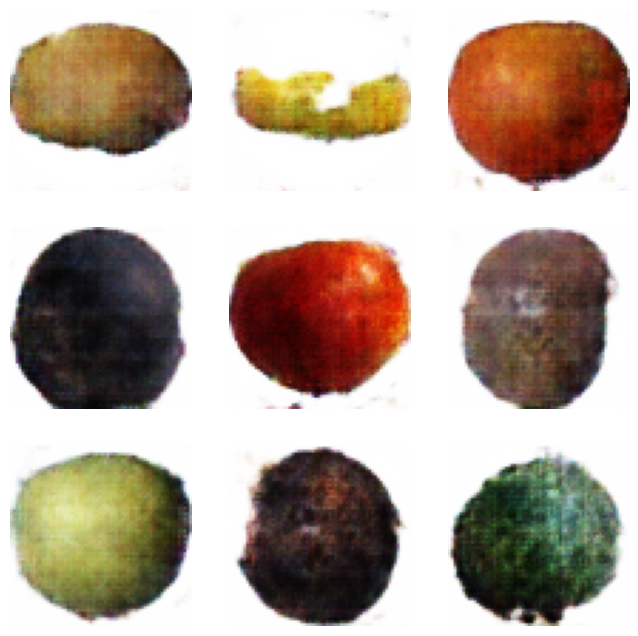

In [42]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i in range(num_samples):
    axs[i // 3, i % 3].imshow(sample_images[i])
    axs[i // 3, i % 3].axis('off')
plt.show()

Estas serían imágenes creadas con las GANs sobre las imágenes originales.